<a href="https://colab.research.google.com/github/TsaiMandy9112/Artificial-Intelligence/blob/main/AI_Chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Dataset

11490434/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


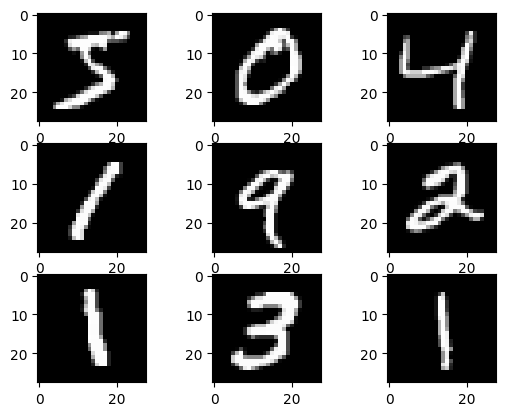

In [ ]:
# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

# **MLP Model**

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets
import matplotlib.pyplot as plt

class SimpleMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 20),
            nn.ReLU(),
            nn.Linear(20, 10)
        )

    def forward(self, x):
        return self.layers(x)

model = SimpleMLP()
print(model)

SimpleMLP(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=20, bias=True)
    (2): ReLU()
    (3): Linear(in_features=20, out_features=10, bias=True)
  )
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
def correct(output, target):
  predicted_digits = output.argmax(1) # pick digit with largest network output
  correct_ones = (predicted_digits == target).type(torch.float) # 1.0 for correct, 0.0 for incorrect
  return correct_ones.sum().item()

In [ ]:
def train(data_loader, model, criterion, optimizer):
  model.train()

  num_batches = len(data_loader)
  num_items = len(data_loader.dataset)

  total_loss = 0
  total_correct = 0
  for data, target in data_loader:
    # Copy data and targets to GPU
    data = data
    target = target

    # Do a forward pass
    output = model(data)

    # Calculate the loss
    loss = criterion(output, target)
    total_loss += loss

    # Count number of correct digits
    total_correct += correct(output, target)

    # Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  train_loss = total_loss/num_batches
  accuracy = total_correct/num_items
  print(f"Average loss: {train_loss:7f}, accuracy: {accuracy:.2%}")

In [ ]:
def test(test_loader, model, criterion):
    model.eval()

    num_batches = len(test_loader)
    num_items = len(test_loader.dataset)

    test_loss = 0
    total_correct = 0

    with torch.no_grad():
      for data, target in test_loader:
        # Copy data and targets to GPU
        data = data
        target = target

        # Do a forward pass
        output = model(data)

        # Calculate the loss
        loss = criterion(output, target)
        test_loss += loss.item()

        # Count number of correct digits
        total_correct += correct(output, target)

    test_loss = test_loss/num_batches
    accuracy = total_correct/num_items

    print(f"Testset accuracy: {100*accuracy:>0.1f}%, average loss: {test_loss:>7f}")

In [ ]:
from torchvision.transforms import ToTensor
import os

batch_size = 32
data_dir = '/content/'

train_dataset = datasets.MNIST(data_dir, train=True, download=True, transform=ToTensor())
test_dataset = datasets.MNIST(data_dir, train=False, transform=ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 86934280.78it/s]


Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 57355915.64it/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28620402.90it/s]


Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1257377.65it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [ ]:
for (data, target) in train_loader:
  print('data:', data.size(), 'type:', data.type())
  print('target:', target.size(), 'type:', target.type())
  break

data: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
target: torch.Size([32]) type: torch.LongTensor


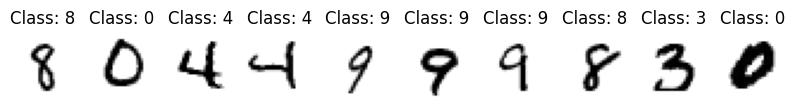

In [ ]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
  plt.subplot(1,10,i+1)
  plt.axis('off')
  plt.imshow(data[i,:,:,:].numpy().reshape(28,28), cmap="gray_r")
  plt.title('Class: '+str(target[i].item()))

In [ ]:
epochs = 10
for epoch in range(epochs):
  print(f"Training epoch: {epoch+1}")
  train(train_loader, model, criterion, optimizer)

Training epoch: 1
Average loss: 0.426527, accuracy: 88.53%
Training epoch: 2
Average loss: 0.242086, accuracy: 93.19%
Training epoch: 3
Average loss: 0.204575, accuracy: 94.25%
Training epoch: 4
Average loss: 0.176779, accuracy: 94.88%
Training epoch: 5
Average loss: 0.156754, accuracy: 95.47%
Training epoch: 6
Average loss: 0.142661, accuracy: 95.90%
Training epoch: 7
Average loss: 0.130905, accuracy: 96.12%
Training epoch: 8
Average loss: 0.122754, accuracy: 96.37%
Training epoch: 9
Average loss: 0.114973, accuracy: 96.57%
Training epoch: 10
Average loss: 0.109020, accuracy: 96.73%


In [ ]:
test(test_loader, model, criterion)

Testset accuracy: 96.1%, average loss: 0.135444


# 實作：用 im2col module 進行轉換

In [ ]:
import numpy as np

def im2col(images, flt_h, flt_w, out_h, out_w, stride=1, pad=0):
  n_bt, n_ch, img_h, img_w = images.shape

  img_pad = np.pad(images, [(0,0), (0,0), (pad, pad), (pad, pad)], "constant")
  cols = np.zeros((n_bt, n_ch, flt_h, flt_w, out_h, out_w))

  for h in range(flt_h):
    h_lim = h + stride*out_h
    for w in range(flt_w):
      w_lim = w + stride*out_w
      cols[:, :, h, w, :, :] = img_pad[:, :, h:h_lim:stride, w:w_lim:stride]
  cols = cols.transpose(1, 2, 3, 0, 4, 5).reshape(n_ch*flt_h*flt_w, n_bt*out_h*out_w)
  return cols

img = np.arange(54).reshape(2,3,3,3)
cols = im2col(img,2,2,2,2,1,0)
print('img before reshape:\n',np.arange(54))
print('=====================================')
print('img :\n',img)
print('=====================================')
print('cols :\n',cols)

img before reshape:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53]
img :
 [[[[ 0  1  2]
   [ 3  4  5]
   [ 6  7  8]]

  [[ 9 10 11]
   [12 13 14]
   [15 16 17]]

  [[18 19 20]
   [21 22 23]
   [24 25 26]]]


 [[[27 28 29]
   [30 31 32]
   [33 34 35]]

  [[36 37 38]
   [39 40 41]
   [42 43 44]]

  [[45 46 47]
   [48 49 50]
   [51 52 53]]]]
cols :
 [[ 0.  1.  3.  4. 27. 28. 30. 31.]
 [ 1.  2.  4.  5. 28. 29. 31. 32.]
 [ 3.  4.  6.  7. 30. 31. 33. 34.]
 [ 4.  5.  7.  8. 31. 32. 34. 35.]
 [ 9. 10. 12. 13. 36. 37. 39. 40.]
 [10. 11. 13. 14. 37. 38. 40. 41.]
 [12. 13. 15. 16. 39. 40. 42. 43.]
 [13. 14. 16. 17. 40. 41. 43. 44.]
 [18. 19. 21. 22. 45. 46. 48. 49.]
 [19. 20. 22. 23. 46. 47. 49. 50.]
 [21. 22. 24. 25. 48. 49. 51. 52.]
 [22. 23. 25. 26. 49. 50. 52. 53.]]


# 實作：用 col2im module 進行轉換

In [ ]:
import numpy as np

def col2im(cols, img_shape, flt_h, flt_w, out_h, out_w, stride=1, pad=0):

  n_bt, n_ch, img_h, img_w = img_shape

  cols = cols.reshape(n_ch, flt_h, flt_w, n_bt, out_h, out_w).transpose(3, 0, 1, 2, 4, 5)
  images = np.zeros((n_bt, n_ch, img_h+2*pad+stride-1, img_w+2*pad+stride-1))

  for h in range(flt_h):
    h_lim = h + stride*out_h
    for w in range(flt_w):
      w_lim = w + stride*out_w
      images[:, :, h:h_lim:stride, w:w_lim:stride] += cols[:, :, h, w, :, :]

  return images[:, :, pad:img_h+pad, pad:img_w+pad]

cols = np.ones((4, 9))
img_shape = (1, 1, 4, 4)
images = col2im(cols, img_shape, 2, 2, 3, 3, 1, 0)
print(images)

[[[[1. 2. 2. 1.]
   [2. 4. 4. 2.]
   [2. 4. 4. 2.]
   [1. 2. 2. 1.]]]]


# 卷積層

In [ ]:
# --卷積層--
class ConvLayer:

  # x_ch:輸入顏色數量, x_h:輸入圖片高度, x_w:輸入圖片寬度
  # n_fit:過濾器數量, fit_h:過濾器高度, fit_w:過濾器寬度
  # stride:步長寬度, pad:填補寬度
  #y_ch:輸出顏色數量, y_h:輸出高度, y_w:輸出寬度
  def __init__(self, x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad):

    # 將參數整合起來
    self.params = (x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad)

    # 過濾器與偏向量的預設值
    self.w = wb_width * np.random.randn(n_flt, x_ch, flt_h, flt_w)
    self.b = wb_width * np.random.randn(1, n_flt)

    # 輸出圖片的大小
    self.y_ch = n_flt  #輸出顏色數量
    self.y_h = (x_h - flt_h + 2*pad) // stride + 1  # 輸出高度
    self.y_w = (x_w - flt_w + 2*pad) // stride + 1  # 輸出寬度

    # AdaGrad用
    self.h_w = np.zeros((n_flt, x_ch, flt_h, flt_w)) + 1e-8
    self.h_b = np.zeros((1, n_flt)) + 1e-8

  def forward(self, x):
    n_bt = x.shape[0]
    x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w

    # 把輸入圖片與過濾器轉換成矩陣
    self.cols = im2col.im2col(x, flt_h, flt_w, y_h, y_w, stride, pad)
    self.w_col = self.w.reshape(n_flt, x_ch*flt_h*flt_w)

    # 輸出的計算：矩陣乘積、加上偏值、啟動函數
    u = np.dot(self.w_col, self.cols).T + self.b
    self.u = u.reshape(n_bt, y_h, y_w, y_ch).transpose(0, 3, 1, 2)
    self.y = np.where(self.u <= 0, 0, self.u)

  def backward(self, grad_y):
    n_bt = grad_y.shape[0]
    x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w

    # delta
    delta = grad_y * np.where(self.u <= 0, 0, 1)
    delta = delta.transpose(0,2,3,1).reshape(n_bt*y_h*y_w, y_ch)

    # 過濾器與偏向量的梯度
    grad_w = np.dot(self.cols, delta)
    self.grad_w = grad_w.T.reshape(n_flt, x_ch, flt_h, flt_w)
    self.grad_b = np.sum(delta, axis=0)

    # 輸出的梯度
    grad_cols = np.dot(delta, self.w_col)
    x_shape = (n_bt, x_ch, x_h, x_w)
    self.grad_x = col2im.col2im(grad_cols.T, x_shape, flt_h, flt_w, y_h, y_w, stride, pad)

  def update(self, eta):
    self.h_w += self.grad_w * self.grad_w
    self.w -= eta / np.sqrt(self.h_w) * self.grad_w

    self.h_b += self.grad_b * self.grad_b
    self.b -= eta / np.sqrt(self.h_b) * self.grad_b

# 池化層

In [ ]:
# --池化層--
class PoolingLayer:

  # x_ch:輸入顏色數量, x_h:輸入圖片高度, x_w:輸入圖片寬度
  # pool:池化區域的大小, pad:填補寬度
  def __init__(self, x_ch, x_h, x_w, pool, pad):
    # 整合參數
    self.params = (x_ch, x_h, x_w, pool, pad)

    self.y_ch = x_ch  # 輸出顏色數量
    self.y_h = x_h//pool if x_h%pool==0 else x_h//pool+1  # 輸出高度
    self.y_w = x_w//pool if x_w%pool==0 else x_w//pool+1  # 輸出寬度

  def forward(self, x):
    n_bt = x.shape[0]
    x_ch, x_h, x_w, pool, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w

    # 把輸入圖片轉換成矩陣
    cols = im2col.im2col(x, pool, pool, y_h, y_w, pool, pad)
    cols = cols.T.reshape(n_bt*y_h*y_w*x_ch, pool*pool)

    # 輸出的計算：最大池化
    y = np.max(cols, axis=1)
    self.y = y.reshape(n_bt, y_h, y_w, x_ch).transpose(0, 3, 1, 2)

    # 儲存最大值的索引
    self.max_index = np.argmax(cols, axis=1)

  def backward(self, grad_y):
    n_bt = grad_y.shape[0]
    x_ch, x_h, x_w, pool, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w

    # 取代輸出梯度的軸
    grad_y = grad_y.transpose(0, 2, 3, 1)

    # 只在各行最大值的元素放入輸入的梯度
    grad_cols = np.zeros((pool*pool, grad_y.size))
    grad_cols[self.max_index.reshape(-1), np.arange(grad_y.size)] = grad_y.reshape(-1)
    grad_cols = grad_cols.reshape(pool, pool, n_bt, y_h, y_w, y_ch)
    grad_cols = grad_cols.transpose(5,0,1,2,3,4)
    grad_cols = grad_cols.reshape( y_ch*pool*pool, n_bt*y_h*y_w)

    # 輸入的梯度
    x_shape = (n_bt, x_ch, x_h, x_w)
    self.grad_x = col2im.col2im(grad_cols, x_shape, pool, pool, y_h, y_w, pool, pad)


# 密集層

In [ ]:
# --全連接 中間層 --
class MiddleLayer(BaseLayer):
  def forward(self, x):
    self.x = x
    self.u = np.dot(x, self.w) + self.b
    self.y = np.where(self.u <= 0, 0, self.u)

  def backward(self, grad_y):
    delta = grad_y * np.where(self.u <= 0, 0, 1)
    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)
    self.grad_x = np.dot(delta, self.w.T)

# --全連接 輸出層 --
class OutputLayer(BaseLayer):
  def forward(self, x):
    self.x = x
    u = np.dot(x, self.w) + self.b
    self.y = np.exp(u)/np.sum(np.exp(u), axis=1).reshape(-1, 1)

  def backward(self, t):
    delta = self.y - t
    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)
    self.grad_x = np.dot(delta, self.w.T)

# 實戰演練(一)：實作卷積神經網路

## 載入手寫數字資料集

(1797, 64)


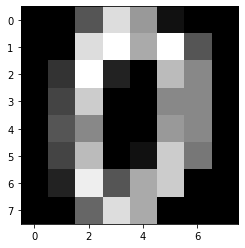

(1797,)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0]


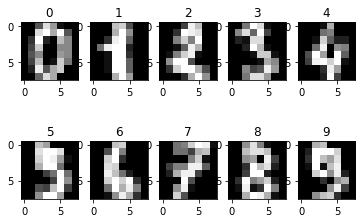

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
print(digits.data.shape)

plt.imshow(digits.data[0].reshape(8, 8), cmap="gray")
plt.show()

print(digits.target.shape)
print(digits.target[:50])

digits = datasets.load_digits()

fig = plt.figure()
for i in range(10):
  ax = fig.add_subplot(2, 5, i+1)
  ax.tick_params(labelbottom="off",bottom="off")
  ax.tick_params(labelleft="off",left="off")
  plt.imshow(digits.data[i].reshape(8, 8), cmap="gray")
  plt.title(digits.target[i])

plt.show()

## 匯入資料集並做前處理

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# --匯入手寫文字資料集--
digits_data = datasets.load_digits()
input_data = digits_data.data
correct = digits_data.target
n_data = len(correct)
print('n_data:',n_data)

n_data: 1797


In [ ]:
# --輸入資料的標準化--
ave_input = np.average(input_data)
std_input = np.std(input_data)
input_data = (input_data - ave_input) / std_input

# --以 one-hot 編碼顯示正確答案--
correct_data = np.zeros((n_data, 10))
for i in range(n_data):
  correct_data[i, correct[i]] = 1.0

# --訓練資料與測試資料--
index = np.arange(n_data)
index_train = index[index%3 != 0]
index_test = index[index%3 == 0]

print('index:',index)
print('index_train.shape:',index_train.shape)
print('index_test.shape:',index_test.shape)

index: [   0    1    2 ... 1794 1795 1796]
index_train.shape: (1198,)
index_test.shape: (599,)


In [ ]:
input_train = input_data[index_train, :]  # 訓練輸入
correct_train = correct_data[index_train, :]  # 訓練正確答案
input_test = input_data[index_test, :]  # 測試輸入
correct_test = correct_data[index_test, :]  # 測試正確答案

print('input_train.shape:',input_train.shape)
print('correct_train.shape:',correct_train.shape)
print('input_test.shape:',input_test.shape)
print('correct_test.shape:',correct_test.shape)

n_train = input_train.shape[0]  # 訓練資料的樣本數1198
n_test = input_test.shape[0]  # 測試資料的樣本數599

input_train.shape: (1198, 64)
correct_train.shape: (1198, 10)
input_test.shape: (599, 64)
correct_test.shape: (599, 10)


Epoch:0/50 Error_train:2.340759320573996 Error_test:2.3632973480198944
Epoch:10/50 Error_train:0.05561859068194126 Error_test:0.11734788011755264
Epoch:20/50 Error_train:0.04995586788786841 Error_test:0.09796622531045916
Epoch:30/50 Error_train:0.028882982905461284 Error_test:0.06154734700931762
Epoch:40/50 Error_train:0.011106296735801727 Error_test:0.09269125608136865


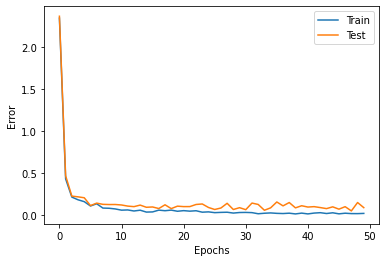

Accuracy Train: 100.0% Accuracy Test: 97.16193656093489%
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.56 0.   0.   0.   0.43]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
第一張圖


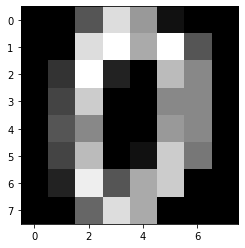

第0張特徵圖


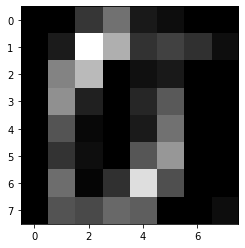

第1張特徵圖


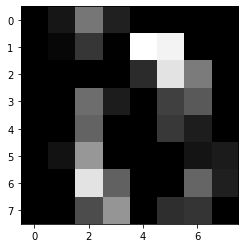

第2張特徵圖


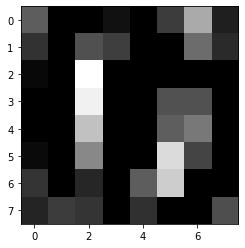

第3張特徵圖


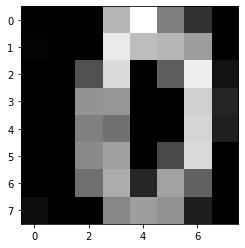

第4張特徵圖


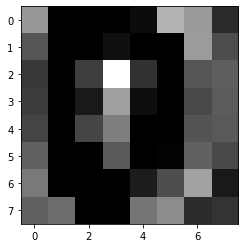

第5張特徵圖


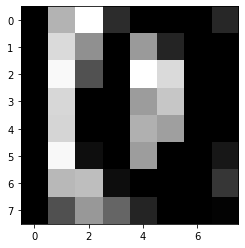

第6張特徵圖


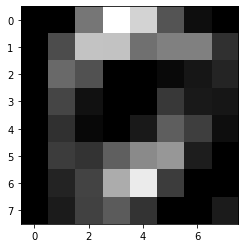

第7張特徵圖


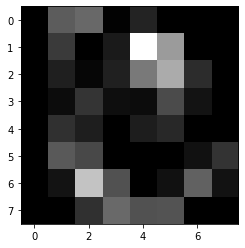

第8張特徵圖


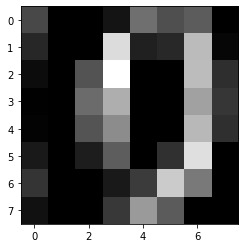

第9張特徵圖


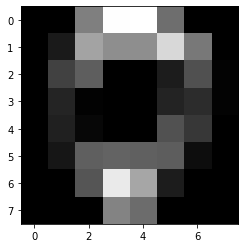

In [ ]:
# -- 各設定値 --
img_h = 8  # 輸入圖片的高度
img_w = 8  # 輸入圖片的寬度
img_ch = 1  # 輸入圖片的顏色數量
wb_width = 0.1  # 權重與偏值的擴充程度
eta = 0.01  # 學習係數
epoch = 50
batch_size = 8
interval = 10  # 顯示過程的間隔
n_sample = 200  # 計算誤差的樣本數

# --im2col--
def im2col(images, flt_h, flt_w, out_h, out_w, stride=1, pad=0):

    n_bt, n_ch, img_h, img_w = images.shape

    img_pad = np.pad(images, [(0,0), (0,0), (pad, pad), (pad, pad)], "constant")
    cols = np.zeros((n_bt, n_ch, flt_h, flt_w, out_h, out_w))

    for h in range(flt_h):
        h_lim = h + stride*out_h
        for w in range(flt_w):
            w_lim = w + stride*out_w
            cols[:, :, h, w, :, :] = img_pad[:, :, h:h_lim:stride, w:w_lim:stride]

    cols = cols.transpose(1, 2, 3, 0, 4, 5).reshape(n_ch*flt_h*flt_w, n_bt*out_h*out_w)
    return cols

# --col2im.py--
def col2im(cols, img_shape, flt_h, flt_w, out_h, out_w, stride=1, pad=0):

    n_bt, n_ch, img_h, img_w = img_shape

    cols = cols.reshape(n_ch, flt_h, flt_w, n_bt, out_h, out_w).transpose(3, 0, 1, 2, 4, 5)
    images = np.zeros((n_bt, n_ch, img_h+2*pad+stride-1, img_w+2*pad+stride-1))

    for h in range(flt_h):
        h_lim = h + stride*out_h
        for w in range(flt_w):
            w_lim = w + stride*out_w
            images[:, :, h:h_lim:stride, w:w_lim:stride] += cols[:, :, h, w, :, :]

    return images[:, :, pad:img_h+pad, pad:img_w+pad]

# --卷積層--
class ConvLayer:
  # x_ch:輸入顏色數量, x_h:輸入圖片高度, x_w:輸入圖片寬度
  # n_fit:過濾器數量, fit_h:過濾器高度, fit_w:過濾器寬度
  # stride:步長寬度, pad:填補寬度
  #y_ch:輸出顏色數量, y_h:輸出高度, y_w:輸出寬度
  def __init__(self, x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad):
    # 將參數整合起來
    self.params = (x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad)
    # 過濾器與偏值的預設值
    self.w = wb_width * np.random.randn(n_flt, x_ch, flt_h, flt_w)
    self.b = wb_width * np.random.randn(1, n_flt)
    # 輸出圖片的大小
    self.y_ch = n_flt  #輸出顏色數量
    self.y_h = (x_h - flt_h + 2*pad) // stride + 1  # 輸出高度
    self.y_w = (x_w - flt_w + 2*pad) // stride + 1  # 輸出寬度
    # AdaGrad用
    self.h_w = np.zeros((n_flt, x_ch, flt_h, flt_w)) + 1e-8
    self.h_b = np.zeros((1, n_flt)) + 1e-8

  def forward(self, x):
    n_bt = x.shape[0]
    x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
    # 把輸入圖片與過濾器轉換成矩陣
    self.cols = im2col(x, flt_h, flt_w, y_h, y_w, stride, pad)
    self.w_col = self.w.reshape(n_flt, x_ch*flt_h*flt_w)
    # 輸出的計算：矩陣乘積、加上偏值、啟動函數
    u = np.dot(self.w_col, self.cols).T + self.b
    self.u = u.reshape(n_bt, y_h, y_w, y_ch).transpose(0, 3, 1, 2)
    self.y = np.where(self.u <= 0, 0, self.u)

  def backward(self, grad_y):
    n_bt = grad_y.shape[0]
    x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
    # delta
    delta = grad_y * np.where(self.u <= 0, 0, 1)
    delta = delta.transpose(0,2,3,1).reshape(n_bt*y_h*y_w, y_ch)
    # 過濾器與偏值的梯度
    grad_w = np.dot(self.cols, delta)
    self.grad_w = grad_w.T.reshape(n_flt, x_ch, flt_h, flt_w)
    self.grad_b = np.sum(delta, axis=0)
    # 輸出的梯度
    grad_cols = np.dot(delta, self.w_col)
    x_shape = (n_bt, x_ch, x_h, x_w)
    self.grad_x = col2im(grad_cols.T, x_shape, flt_h, flt_w,
                   y_h, y_w, stride, pad)

  def update(self, eta):
    self.h_w += self.grad_w * self.grad_w
    self.w -= eta / np.sqrt(self.h_w) * self.grad_w
    self.h_b += self.grad_b * self.grad_b
    self.b -= eta / np.sqrt(self.h_b) * self.grad_b

# --池化層--
class PoolingLayer:
  # x_ch:輸入顏色數量, x_h:輸入圖片高度, x_w:輸入圖片寬度
  # pool:池化區域的大小, pad:填補寬度
  def __init__(self, x_ch, x_h, x_w, pool, pad):
    # 整合參數
    self.params = (x_ch, x_h, x_w, pool, pad)
    self.y_ch = x_ch  # 輸出顏色數量
    self.y_h = x_h//pool if x_h%pool==0 else x_h//pool+1  # 輸出高度
    self.y_w = x_w//pool if x_w%pool==0 else x_w//pool+1  # 輸出寬度

  def forward(self, x):
    n_bt = x.shape[0]
    x_ch, x_h, x_w, pool, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w

    # 把輸入圖片轉換成矩陣
    cols = im2col(x, pool, pool, y_h, y_w, pool, pad)
    cols = cols.T.reshape(n_bt*y_h*y_w*x_ch, pool*pool)

    # 輸出的計算：最大池化
    y = np.max(cols, axis=1)
    self.y = y.reshape(n_bt, y_h, y_w, x_ch).transpose(0, 3, 1, 2)

    # 儲存最大值的索引
    self.max_index = np.argmax(cols, axis=1)

  def backward(self, grad_y):
    n_bt = grad_y.shape[0]
    x_ch, x_h, x_w, pool, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
    # 取代輸出梯度的軸
    grad_y = grad_y.transpose(0, 2, 3, 1)
    # 只在各行最大值的元素放入輸入的梯度
    grad_cols = np.zeros((pool*pool, grad_y.size))
    grad_cols[self.max_index.reshape(-1), np.arange(grad_y.size)] = grad_y.reshape(-1)
    grad_cols = grad_cols.reshape(pool, pool, n_bt, y_h, y_w, y_ch)
    grad_cols = grad_cols.transpose(5,0,1,2,3,4)
    grad_cols = grad_cols.reshape( y_ch*pool*pool, n_bt*y_h*y_w)
    # 輸入的梯度
    x_shape = (n_bt, x_ch, x_h, x_w)
    self.grad_x = col2im(grad_cols, x_shape, pool, pool,
                   y_h, y_w, pool, pad)

# --密集層--
class BaseLayer:
  def __init__(self, n_upper, n):
    self.w = wb_width * np.random.randn(n_upper, n)
    self.b = wb_width * np.random.randn(n)

    self.h_w = np.zeros(( n_upper, n)) + 1e-8
    self.h_b = np.zeros(n) + 1e-8

  def update(self, eta):
    self.h_w += self.grad_w * self.grad_w
    self.w -= eta / np.sqrt(self.h_w) * self.grad_w

    self.h_b += self.grad_b * self.grad_b
    self.b -= eta / np.sqrt(self.h_b) * self.grad_b

# --全連接 中間層 --
class MiddleLayer(BaseLayer):
  def forward(self, x):
    self.x = x
    self.u = np.dot(x, self.w) + self.b
    self.y = np.where(self.u <= 0, 0, self.u)

  def backward(self, grad_y):
    delta = grad_y * np.where(self.u <= 0, 0, 1)

    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)
    self.grad_x = np.dot(delta, self.w.T)

# --全連接 輸出層 --
class OutputLayer(BaseLayer):
  def forward(self, x):
    self.x = x
    u = np.dot(x, self.w) + self.b
    self.y = np.exp(u)/np.sum(np.exp(u), axis=1).reshape(-1, 1)

  def backward(self, t):
    delta = self.y - t

    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)
    self.grad_x = np.dot(delta, self.w.T)

#  --各層的初始化--
cl_1 = ConvLayer(img_ch, img_h, img_w, 10, 3, 3, 1, 1)
pl_1 = PoolingLayer(cl_1.y_ch, cl_1.y_h, cl_1.y_w, 2, 0)

n_fc_in = pl_1.y_ch * pl_1.y_h * pl_1.y_w
ml_1 = MiddleLayer(n_fc_in, 100)
ol_1 = OutputLayer(100, 10)

# --前向傳播--
def forward_propagation(x):
  n_bt = x.shape[0]

  images = x.reshape(n_bt, img_ch, img_h, img_w)
  cl_1.forward(images)
  pl_1.forward(cl_1.y)

  fc_input = pl_1.y.reshape(n_bt, -1)
  ml_1.forward(fc_input)
  ol_1.forward(ml_1.y)

# --反向傳播--
def backpropagation(t):
  n_bt = t.shape[0]

  ol_1.backward(t)
  ml_1.backward(ol_1.grad_x)

  grad_img = ml_1.grad_x.reshape(n_bt, pl_1.y_ch, pl_1.y_h, pl_1.y_w)
  pl_1.backward(grad_img)
  cl_1.backward(pl_1.grad_x)

# --更新權重與偏值--
def uppdate_wb():
  cl_1.update(eta)
  ml_1.update(eta)
  ol_1.update(eta)


# --前向傳播樣本--
def forward_sample(inp, correct, n_sample):
  index_rand = np.arange(len(correct))
  np.random.shuffle(index_rand)
  index_rand = index_rand[:n_sample]
  x = inp[index_rand, :]
  t = correct[index_rand, :]
  forward_propagation(x)
  return x,t

# --計算交叉熵誤差--
def get_error(t, batch_size):
  return -np.sum(t * np.log(ol_1.y + 1e-7)) / batch_size

# --記錄誤差用--
train_error_x = []
train_error_y = []
test_error_x = []
test_error_y = []

# --學習與記錄經過--
n_batch = n_train // batch_size
for i in range(epoch):
  # --計算誤差--
  x, t = forward_sample(input_train, correct_train, n_sample)

  error_train = get_error(t, n_sample)

  x, t = forward_sample(input_test, correct_test, n_sample)
  error_test = get_error(t, n_sample)

  # --記錄誤差--
  train_error_x.append(i)
  train_error_y.append(error_train)
  test_error_x.append(i)
  test_error_y.append(error_test)

  # --顯示過程--
  if i%interval == 0:
    print("Epoch:" + str(i) + "/" + str(epoch),
       "Error_train:" + str(error_train),
       "Error_test:" + str(error_test))

  # --學習--
  index_rand = np.arange(n_train)
  np.random.shuffle(index_rand)

  for j in range(n_batch):
    mb_index = index_rand[j*batch_size : (j+1)*batch_size]
    x = input_train[mb_index, :]
    t = correct_train[mb_index, :]

    forward_propagation(x)
    backpropagation(t)
    uppdate_wb()

# --以圖表顯示誤差記錄--
plt.plot(train_error_x, train_error_y, label="Train")
plt.plot(test_error_x, test_error_y, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")

plt.show()

# --計算準確率—
x, t = forward_sample(input_train, correct_train, n_train)
count_train = np.sum(np.argmax(ol_1.y, axis=1) == np.argmax(t, axis=1))

x, t = forward_sample(input_test, correct_test, n_test)
count_test = np.sum(np.argmax(ol_1.y, axis=1) == np.argmax(t, axis=1))

print("Accuracy Train:", str(count_train/n_train*100) + "%",
   "Accuracy Test:", str(count_test/n_test*100) + "%")

# 實際拿 CNN 模型預測資料
samples = input_test[:5]
forward_propagation(samples)
print(ol_1.y.round(2))
print(correct_test[:5])

from matplotlib import pyplot

# 觀察訓練後之特徵圖
print('第一張圖')
images = input_test[0].reshape(8,8)
pyplot.imshow(images, cmap=pyplot.get_cmap('gray'))
pyplot.show()

# plot first few images
for i in range(10):
  print('第' + str(i) + '張特徵圖')
  pyplot.imshow(cl_1.y[0][i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()


# 實作演練(二)：實作層數更多的CNN網路

Epoch:0/50 Error_train:2.3113189687286106 Error_test:2.3193842918505827
Epoch:10/50 Error_train:0.06967605785047973 Error_test:0.07001835988211426
Epoch:20/50 Error_train:0.03947809364443799 Error_test:0.07991384512345899
Epoch:30/50 Error_train:0.009857388330063029 Error_test:0.033793964541222146
Epoch:40/50 Error_train:0.012697159915388875 Error_test:0.04556521573998459


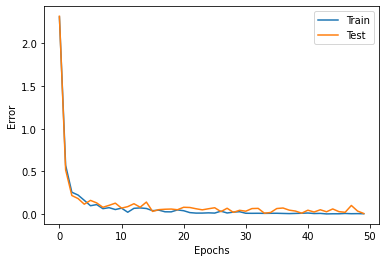

Accuracy Train: 100.0% Accuracy Test: 98.6644407345576%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits_data = datasets.load_digits()
input_data = digits_data.data
correct = digits_data.target
n_data = len(correct)

ave_input = np.average(input_data)
std_input = np.std(input_data)
input_data = (input_data - ave_input) / std_input

correct_data = np.zeros((n_data, 10))
for i in range(n_data):
    correct_data[i, correct[i]] = 1.0

index = np.arange(n_data)
index_train = index[index%3 != 0]
index_test = index[index%3 == 0]

input_train = input_data[index_train, :]
correct_train = correct_data[index_train, :]
input_test = input_data[index_test, :]
correct_test = correct_data[index_test, :]

n_train = input_train.shape[0]
n_test = input_test.shape[0]

img_h = 8
img_w = 8
img_ch = 1

wb_width = 0.1
eta = 0.01
epoch = 50
batch_size = 8
interval = 10
n_sample = 200

# -- im2col --
def im2col(images, flt_h, flt_w, out_h, out_w, stride, pad):

  n_bt, n_ch, img_h, img_w = images.shape

  img_pad = np.pad(images, [(0,0), (0,0), (pad, pad), (pad, pad)], "constant")
  cols = np.zeros((n_bt, n_ch, flt_h, flt_w, out_h, out_w))

  for h in range(flt_h):
    h_lim = h + stride*out_h
    for w in range(flt_w):
      w_lim = w + stride*out_w
      cols[:, :, h, w, :, :] = img_pad[:, :, h:h_lim:stride, w:w_lim:stride]

  cols = cols.transpose(1, 2, 3, 0, 4, 5).reshape(n_ch*flt_h*flt_w, n_bt*out_h*out_w)
  return cols

# -- col2im --
def col2im(cols, img_shape, flt_h, flt_w, out_h, out_w, stride, pad):

  n_bt, n_ch, img_h, img_w = img_shape

  cols = cols.reshape(n_ch, flt_h, flt_w, n_bt, out_h, out_w, ).transpose(3, 0, 1, 2, 4, 5)
  images = np.zeros((n_bt, n_ch, img_h+2*pad+stride-1, img_w+2*pad+stride-1))

  for h in range(flt_h):
    h_lim = h + stride*out_h
    for w in range(flt_w):
      w_lim = w + stride*out_w
      images[:, :, h:h_lim:stride, w:w_lim:stride] += cols[:, :, h, w, :, :]

  return images[:, :, pad:img_h+pad, pad:img_w+pad]

class ConvLayer:
  def __init__(self, x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad):
    self.params = (x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad)

    self.w = wb_width * np.random.randn(n_flt, x_ch, flt_h, flt_w)
    self.b = wb_width * np.random.randn(1, n_flt)

    self.y_ch = n_flt
    self.y_h = (x_h - flt_h + 2*pad) // stride + 1
    self.y_w = (x_w - flt_w + 2*pad) // stride + 1

    # AdaGrad用
    self.h_w = np.zeros((n_flt, x_ch, flt_h, flt_w)) + 1e-8
    self.h_b = np.zeros((1, n_flt)) + 1e-8

  def forward(self, x):
    n_bt = x.shape[0]
    x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w

    self.cols = im2col(x, flt_h, flt_w, y_h, y_w, stride, pad)
    self.w_col = self.w.reshape(n_flt, x_ch*flt_h*flt_w)

    u = np.dot(self.w_col, self.cols).T + self.b
    self.u = u.reshape(n_bt, y_h, y_w, y_ch).transpose(0, 3, 1, 2)
    self.y = np.where(self.u <= 0, 0, self.u)

  def backward(self, grad_y):
    n_bt = grad_y.shape[0]
    x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w

    # delta
    delta = grad_y * np.where(self.u <= 0, 0, 1)
    delta = delta.transpose(0,2,3,1).reshape(n_bt*y_h*y_w, y_ch)

    grad_w = np.dot(self.cols, delta)
    self.grad_w = grad_w.T.reshape(n_flt, x_ch, flt_h, flt_w)
    self.grad_b = np.sum(delta, axis=0)

    grad_cols = np.dot(delta, self.w_col)
    x_shape = (n_bt, x_ch, x_h, x_w)
    self.grad_x = col2im(grad_cols.T, x_shape, flt_h, flt_w, y_h, y_w, stride, pad)

  def update(self, eta):
    self.h_w += self.grad_w * self.grad_w
    self.w -= eta / np.sqrt(self.h_w) * self.grad_w

    self.h_b += self.grad_b * self.grad_b
    self.b -= eta / np.sqrt(self.h_b) * self.grad_b

class PoolingLayer:
  def __init__(self, x_ch, x_h, x_w, pool, pad):
    self.params = (x_ch, x_h, x_w, pool, pad)

    self.y_ch = x_ch
    self.y_h = x_h//pool if x_h%pool==0 else x_h//pool+1
    self.y_w = x_w//pool if x_w%pool==0 else x_w//pool+1

  def forward(self, x):
    n_bt = x.shape[0]
    x_ch, x_h, x_w, pool, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w

    cols = im2col(x, pool, pool, y_h, y_w, pool, pad)
    cols = cols.T.reshape(n_bt*y_h*y_w*x_ch, pool*pool)

    y = np.max(cols, axis=1)
    self.y = y.reshape(n_bt, y_h, y_w, x_ch).transpose(0, 3, 1, 2)

    self.max_index = np.argmax(cols, axis=1)

  def backward(self, grad_y):
    n_bt = grad_y.shape[0]
    x_ch, x_h, x_w, pool, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w

    grad_y = grad_y.transpose(0, 2, 3, 1)

    grad_cols = np.zeros((pool*pool, grad_y.size))
    grad_cols[self.max_index.reshape(-1), np.arange(grad_y.size)] = grad_y.reshape(-1)
    grad_cols = grad_cols.reshape(pool, pool, n_bt, y_h, y_w, y_ch)
    grad_cols = grad_cols.transpose(5,0,1,2,3,4)
    grad_cols = grad_cols.reshape( y_ch*pool*pool, n_bt*y_h*y_w)

    x_shape = (n_bt, x_ch, x_h, x_w)
    self.grad_x = col2im(grad_cols, x_shape, pool, pool, y_h, y_w, pool, pad)

class BaseLayer:
  def __init__(self, n_upper, n):
    self.w = wb_width * np.random.randn(n_upper, n)
    self.b = wb_width * np.random.randn(n)

    self.h_w = np.zeros(( n_upper, n)) + 1e-8
    self.h_b = np.zeros(n) + 1e-8

  def update(self, eta):
    self.h_w += self.grad_w * self.grad_w
    self.w -= eta / np.sqrt(self.h_w) * self.grad_w

    self.h_b += self.grad_b * self.grad_b
    self.b -= eta / np.sqrt(self.h_b) * self.grad_b

class MiddleLayer(BaseLayer):
  def forward(self, x):
    self.x = x
    self.u = np.dot(x, self.w) + self.b
    self.y = np.where(self.u <= 0, 0, self.u)

  def backward(self, grad_y):
    delta = grad_y * np.where(self.u <= 0, 0, 1)

    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)

    self.grad_x = np.dot(delta, self.w.T)

class OutputLayer(BaseLayer):
  def forward(self, x):
    self.x = x
    u = np.dot(x, self.w) + self.b
    self.y = np.exp(u)/np.sum(np.exp(u), axis=1).reshape(-1, 1)

  def backward(self, t):
    delta = self.y - t

    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)

    self.grad_x = np.dot(delta, self.w.T)

class Dropout:
  def __init__(self, dropout_ratio):
    self.dropout_ratio = dropout_ratio

  def forward(self, x, is_train):
    if is_train:
      rand = np.random.rand(*x.shape)
      self.dropout = np.where(rand > self.dropout_ratio, 1, 0)
      self.y = x * self.dropout
    else:
      self.y = (1-self.dropout_ratio)*x

  def backward(self, grad_y):
    self.grad_x = grad_y * self.dropout

cl_1 = ConvLayer(img_ch, img_h, img_w, 10, 3, 3, 1, 1)
cl_2 = ConvLayer(cl_1.y_ch, cl_1.y_h, cl_1.y_w, 10, 3, 3, 1, 1)
pl_1 = PoolingLayer(cl_2.y_ch, cl_2.y_h, cl_2.y_w, 2, 0)

n_fc_in = pl_1.y_ch * pl_1.y_h * pl_1.y_w
ml_1 = MiddleLayer(n_fc_in, 200)
dr_1 = Dropout(0.5)

ml_2 = MiddleLayer(200, 200)
dr_2 = Dropout(0.5)

ol_1 = OutputLayer(200, 10)

def forward_propagation(x, is_train):
  n_bt = x.shape[0]

  images = x.reshape(n_bt, img_ch, img_h, img_w)
  cl_1.forward(images)
  cl_2.forward(cl_1.y)
  pl_1.forward(cl_2.y)

  fc_input = pl_1.y.reshape(n_bt, -1)
  ml_1.forward(fc_input)
  dr_1.forward(ml_1.y, is_train)
  ml_2.forward(dr_1.y)
  dr_2.forward(ml_2.y, is_train)
  ol_1.forward(dr_2.y)

def backpropagation(t):
  n_bt = t.shape[0]

  ol_1.backward(t)
  dr_2.backward(ol_1.grad_x)
  ml_2.backward(dr_2.grad_x)
  dr_1.backward(ml_2.grad_x)
  ml_1.backward(dr_1.grad_x)

  grad_img = ml_1.grad_x.reshape(n_bt, pl_1.y_ch, pl_1.y_h, pl_1.y_w)
  pl_1.backward(grad_img)
  cl_2.backward(pl_1.grad_x)
  cl_1.backward(cl_2.grad_x)

def uppdate_wb():
  cl_1.update(eta)
  cl_2.update(eta)
  ml_1.update(eta)
  ml_2.update(eta)
  ol_1.update(eta)

def get_error(t, batch_size):
  return -np.sum(t * np.log(ol_1.y + 1e-7)) / batch_size

def forward_sample(inp, correct, n_sample):
  index_rand = np.arange(len(correct))
  np.random.shuffle(index_rand)
  index_rand = index_rand[:n_sample]
  x = inp[index_rand, :]
  t = correct[index_rand, :]
  forward_propagation(x, False)
  return x, t

train_error_x = []
train_error_y = []
test_error_x = []
test_error_y = []

n_batch = n_train // batch_size
for i in range(epoch):
  x, t = forward_sample(input_train, correct_train, n_sample)
  error_train = get_error(t, n_sample)

  x, t = forward_sample(input_test, correct_test, n_sample)
  error_test = get_error(t, n_sample)

  train_error_x.append(i)
  train_error_y.append(error_train)
  test_error_x.append(i)
  test_error_y.append(error_test)

  if i%interval == 0:
    print("Epoch:" + str(i) + "/" + str(epoch),
       "Error_train:" + str(error_train),
       "Error_test:" + str(error_test))

  index_rand = np.arange(n_train)
  np.random.shuffle(index_rand)
  for j in range(n_batch):
    mb_index = index_rand[j*batch_size : (j+1)*batch_size]
    x = input_train[mb_index, :]
    t = correct_train[mb_index, :]

    forward_propagation(x, True)
    backpropagation(t)
    uppdate_wb()

plt.plot(train_error_x, train_error_y, label="Train")
plt.plot(test_error_x, test_error_y, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")

plt.show()

x, t = forward_sample(input_train, correct_train, n_train)
count_train = np.sum(np.argmax(ol_1.y, axis=1) == np.argmax(t, axis=1))

x, t = forward_sample(input_test, correct_test, n_test)
count_test = np.sum(np.argmax(ol_1.y, axis=1) == np.argmax(t, axis=1))

print("Accuracy Train:", str(count_train/n_train*100) + "%",
   "Accuracy Test:", str(count_test/n_test*100) + "%")

# **LeNet Architecture**

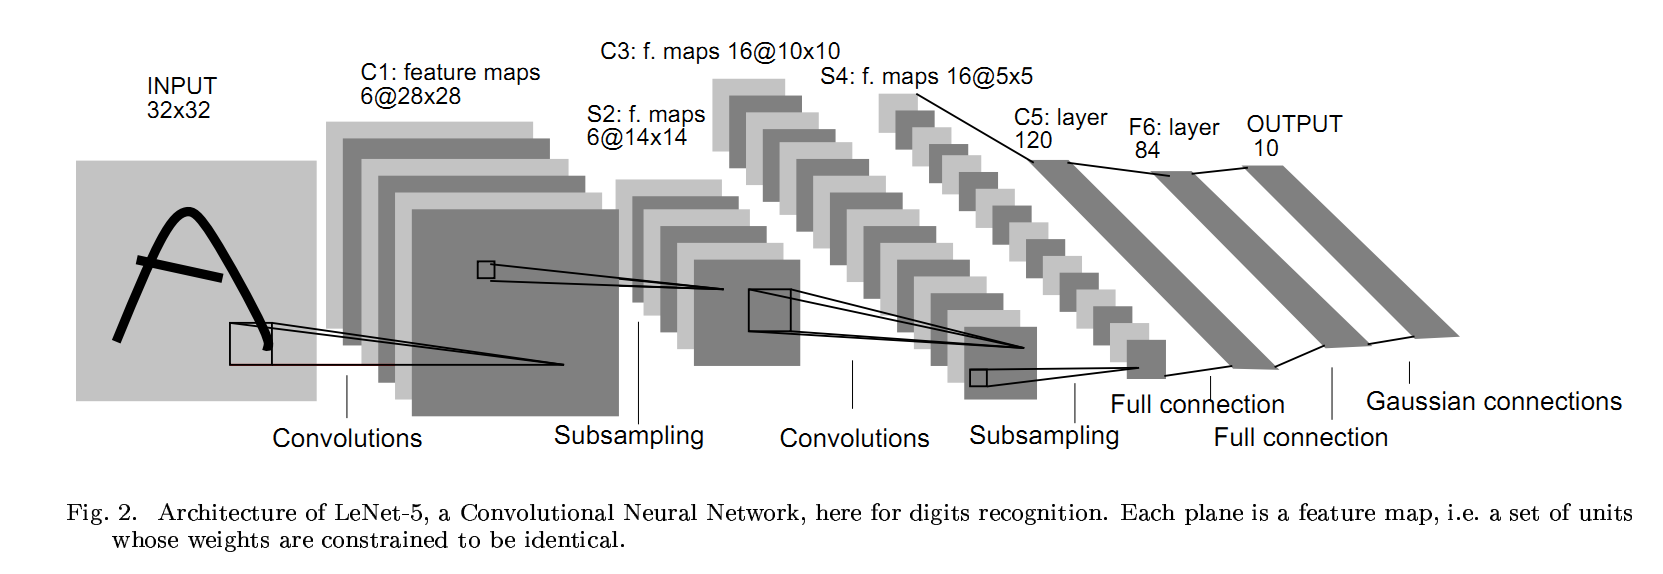

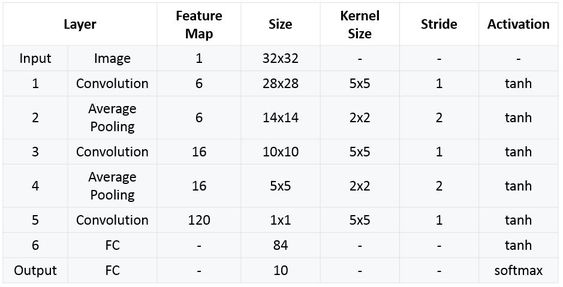

**C1 layer-convolutional layer:**
*   Input picture: 32 * 32
*   Convolution kernel size: 5 * 5
*   Convolution kernel types: 6
*   Output featuremap size: 28 * 28 (32-5 + 1) = 28
*   Number of neurons: 28 28 6
*   Trainable parameters: (5 5 + 1) 6 (5 * 5 = 25 unit parameters and one bias *   parameter per filter, a total of 6 filters)
*   Number of connections: (5 5 + 1) 6 28 28 = 122304

**S2 layer-pooling layer (downsampling layer)**:
*   Input: 28 * 28
*   Sampling area: 2 * 2
*   Sampling method: 4 inputs are added, multiplied by a trainable parameter, plus a trainable offset. Results via sigmoid
*   Sampling type: 6
*   Output featureMap size: 14 * 14 (28/2)
*   Number of neurons: 14 14 6
*   Trainable parameters: 2 * 6 (the weight of the sum + the offset)
*   Number of connections: (2 2 + 1) 6 14 14
*   The size of each feature map in S2 is 1/4 of the size of the feature map in C1.

**C3 layer-convolutional layer**:
*   Input: all 6 or several feature map combinations in S2
*   Convolution kernel size: 5 * 5
*   Convolution kernel type: 16
*   Output featureMap size: 10 * 10 (14-5 + 1) = 10
*   Each feature map in C3 is connected to all 6 or several feature maps in S2, indicating that the feature map of this layer is a different combination of the feature maps extracted from the previous layer.
*   One way is that the first 6 feature maps of C3 take 3 adjacent feature map subsets in S2 as input. The next 6 feature maps take 4 subsets of neighboring feature maps in S2 as input. The next three take the non-adjacent 4 feature map subsets as input. The last one takes all the feature maps in S2 as input.
*   The trainable parameters are: 6 (3 5 5 + 1) + 6 (4 5 5 + 1) + 3 (4 5 5 + 1) + 1 (6 5 5 +1) = 1516
*   Number of connections: 10 10 1516 = 151600

**S4 layer-pooling layer (downsampling layer):**
*   Input: 10 * 10
*   Sampling area: 2 * 2
*   Sampling method: 4 inputs are added, multiplied by a trainable parameter, plus a trainable offset. Results via sigmoid
*   Sampling type: 16
*   Output featureMap size: 5 * 5 (10/2)
*   Number of neurons: 5 5 16 = 400
*   Trainable parameters: 2 * 16 = 32 (the weight of the sum + the offset)
*   Number of connections: 16 (2 2 + 1) 5 5 = 2000
*   The size of each feature map in S4 is 1/4 of the size of the feature map in C3

**C5 layer-convolution layer:**
*   Input: All 16 unit feature maps of the S4 layer (all connected to s4)
*   Convolution kernel size: 5 * 5
*   Convolution kernel type: 120
*   Output featureMap size: 1 * 1 (5-5 + 1)
*   Trainable parameters / connection: 120 (16 5 * 5 + 1) = 48120

**F6 layer-fully connected layer:**
*   Input: c5 120-dimensional vector
*   Calculation method: calculate the dot product between the input vector and the weight vector, plus an offset, and the result is output through the sigmoid function.
*   Trainable parameters: 84 * (120 + 1) = 10164

In [ ]:
# Importing necessary libraries
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [ ]:
# Loading Dataset
# Loading the dataset and perform splitting
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Image Data Preprocessing
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
# LeNet Model Architecture
# Building the Model Architecture
model = Sequential()
# Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
# That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)
model.add(Dense(84, activation='relu'))
# The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 38s 72ms/step - loss: 0.3193 - accuracy: 0.9061 - val_loss: 0.0870 - val_accuracy: 0.9734
Epoch 2/20
469/469 [==============================] - 25s 54ms/step - loss: 0.0869 - accuracy: 0.9742 - val_loss: 0.0580 - val_accuracy: 0.9818
Epoch 3/20
469/469 [==============================] - 25s 53ms/step - loss: 0.0613 - accuracy: 0.9812 - val_loss: 0.0491 - val_accuracy: 0.9852
Epoch 4/20
469/469 [==============================] - 27s 57ms/step - loss: 0.0501 - accuracy: 0.9844 - val_loss: 0.0462 - val_accuracy: 0.9859
Epoch 5/20
469/469 [==============================] - 26s 55ms/step - loss: 0.0426 - accuracy: 0.9863 - val_loss: 0.0373 - val_accuracy: 0.9886
Epoch 6/20
469/469 [==============================] - 25s 53ms/step - loss: 0.0357 - accuracy: 0.9888 - val_loss: 0.0385 - val_accuracy: 0.9882
Epoch 7/20
469/469 [==============================] - 25s 52ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0317 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0385 - accuracy: 0.9905
Test Loss: 0.0385044701397419
Test accuracy: 0.9904999732971191


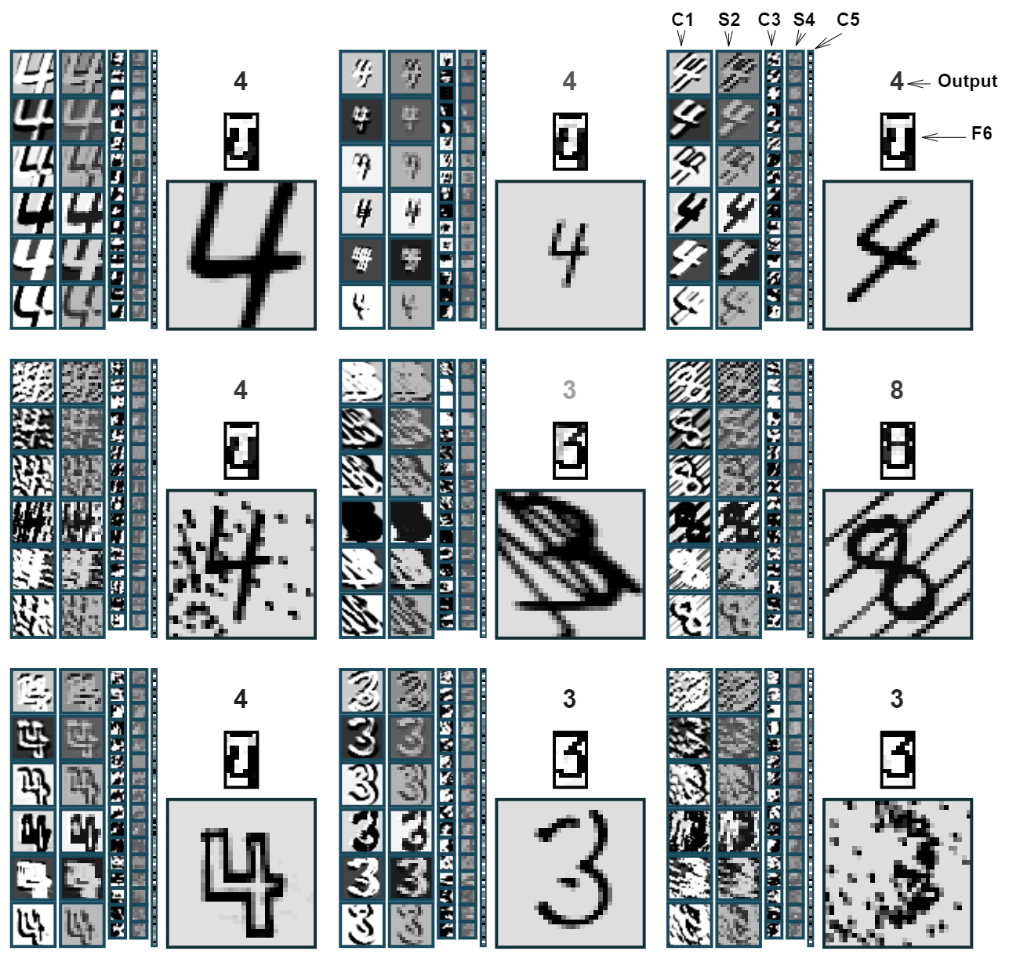